# Loan Approval prediction.

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Loading the Datasets

In [2]:
df = pd.read_csv('Loan Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Summary of the dataset

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

## 1. Datatype Conversion

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df = df.replace({
    'Dependents':'[+]'
},'',regex=True)

In [7]:
df.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [8]:
df.dropna(subset = ['Dependents'], inplace=True)

In [9]:
df.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [10]:
df.Dependents = df.Dependents.astype(int)

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 2. Dealing With Null Values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
# fill the missing values for numerical terms - mean
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())
df["Dependents"]= df["Dependents"].fillna(df["Dependents"].mean())

In [18]:
# fill the missing values for categorical terms - mode(most frequent)
df["Gender"]= df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]= df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]= df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 3. Dealing with Outliers 

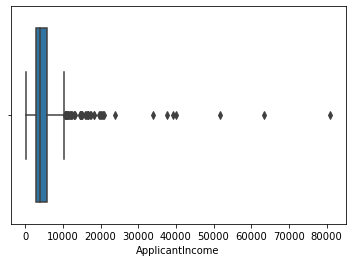

In [20]:
#Boxplot to check outliers in income of the applicant
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

In [21]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.ApplicantIncome.quantile(0.25)
Q3 = df.ApplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [22]:
df[(df.ApplicantIncome < lowerlimit)  | (df.ApplicantIncome > upperlimit)] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N
34,LP001100,Male,No,3,Graduate,No,12500,3000.0,320.000000,360.0,1.000000,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.000000,360.0,0.000000,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.000000,360.0,1.000000,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.000000,360.0,1.000000,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.000000,180.0,1.000000,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.000000,360.0,1.000000,Urban,Y
126,LP001448,Male,Yes,3,Graduate,No,23803,0.0,370.000000,360.0,1.000000,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.000000,180.0,0.000000,Urban,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.000000,480.0,0.846995,Urban,Y


In [23]:
 # Droping the rows containing height beyond lower and upper limit.
df_1 = df[(df.ApplicantIncome > lowerlimit) & (df.ApplicantIncome < upperlimit)]
df_1.shape

(550, 13)

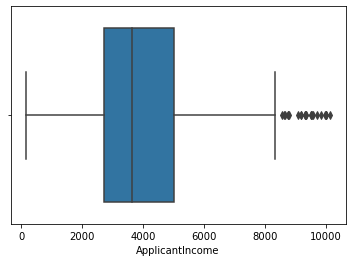

In [24]:
sns.boxplot(x=df_1['ApplicantIncome'])
plt.show()

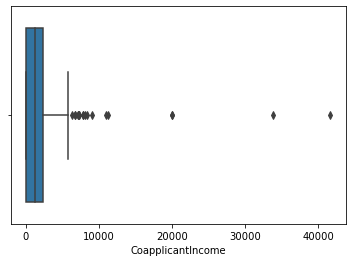

In [25]:
#Boxplot to check outliers in income of the coapplicant
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

In [26]:
Q1 = df.CoapplicantIncome.quantile(0.25)
Q3 = df.CoapplicantIncome.quantile(0.75)
IQR = Q3 - Q1
upperlimit1 = Q3 + (IQR * 1.5)
lowerlimit1 = Q1 - (IQR * 1.5)

In [27]:
 # Droping the rows containing height beyond lower and upper limit.
df_1 = df[(df.CoapplicantIncome > lowerlimit1) & (df.CoapplicantIncome < upperlimit1)]
df_1.shape

(581, 13)

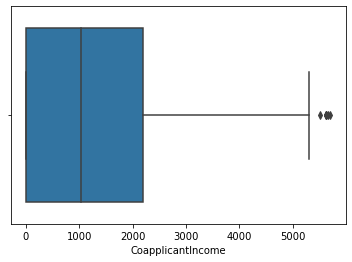

In [28]:
#Boxplot to check outliers in income of the coapplicant
sns.boxplot(x=df_1['CoapplicantIncome'])
plt.show()

In [29]:
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.816926,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

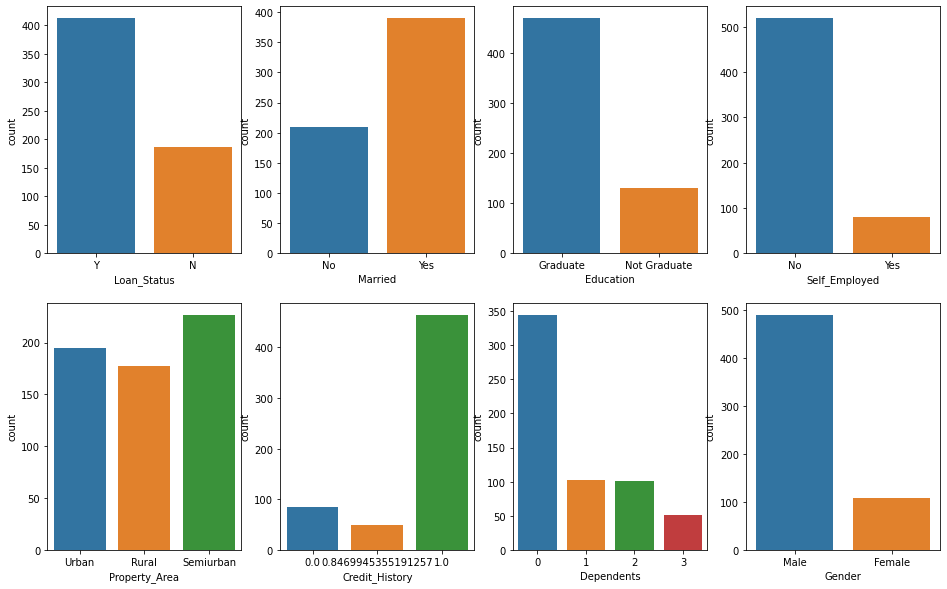

In [30]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data=df,ax=ax[0][0])
sns.countplot('Married', data=df,ax=ax[0][1])
sns.countplot('Education', data=df,ax=ax[0][2])
sns.countplot('Self_Employed', data=df,ax=ax[0][3])
sns.countplot('Property_Area', data=df,ax=ax[1][0])
sns.countplot('Credit_History', data=df,ax=ax[1][1])
sns.countplot('Dependents', data=df,ax=ax[1][2])
sns.countplot('Gender', data=df,ax=ax[1][3])

#### More Loans are approved Vs Rejected

#### Count of Married applicant is more than Non-married

#### Count of graduate is more than non-Graduate

#### Count of self-employed is less than that of Non-Self-employed

#### Maximum properties are located in Semiurban areas

#### Credit History is present for many applicants

#### The count of applicants with several dependents=0 is maximum.

#### Count of Male applicants is more than Female


# Numerical attributes visulaization


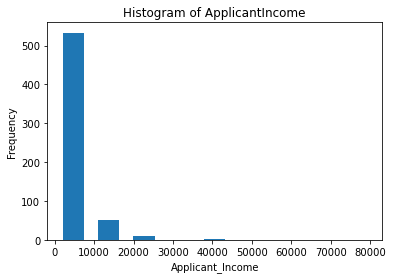

In [31]:
x = df.ApplicantIncome
plt.hist(x,bins=9,rwidth=0.6)
plt.title('Histogram of ApplicantIncome')
plt.xlabel('Applicant_Income')
plt.ylabel('Frequency')
plt.show()

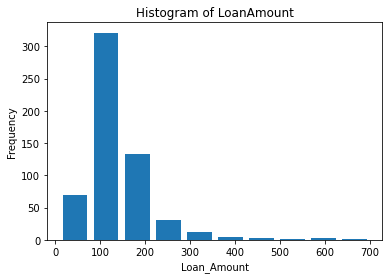

In [32]:
# sns.distplot(df["LoanAmount"])
x = df_1.LoanAmount
plt.hist(x,bins=10,rwidth=0.8)
plt.title('Histogram of LoanAmount')
plt.xlabel('Loan_Amount')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

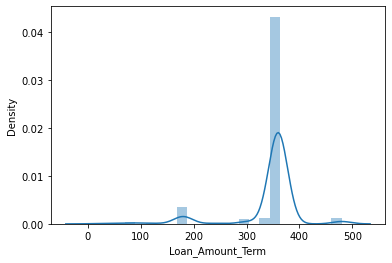

In [33]:
sns.distplot(df_1["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

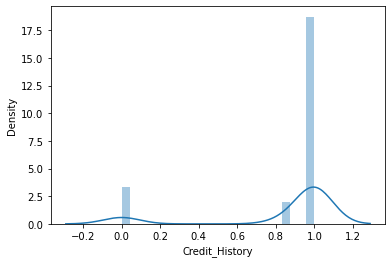

In [34]:
sns.distplot(df_1['Credit_History'])

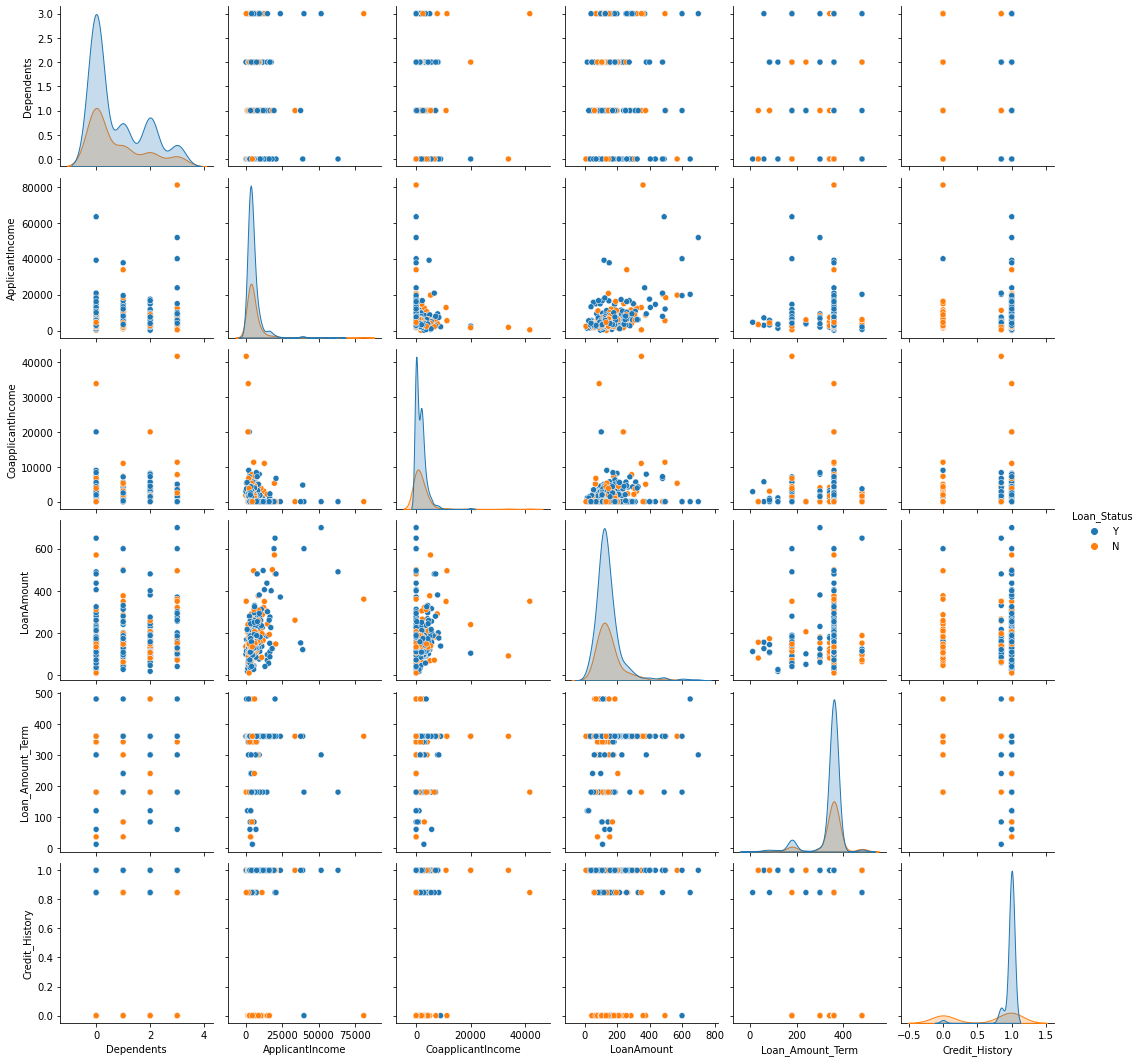

In [35]:
sns.pairplot(df, hue = 'Loan_Status')
plt.show()

# Log Transformation (Attributes)

## Before Log Transformation

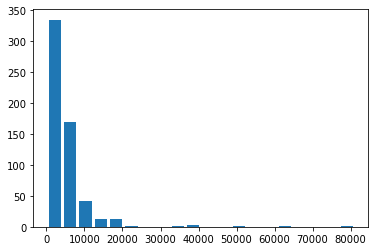

In [36]:
x = df_1.ApplicantIncome
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## After Log Transformation

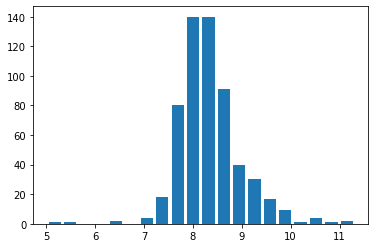

In [37]:
#applying log transformation to the attribute
df_1['ApplicantIncome'] = np.log(df_1['ApplicantIncome']+1)
x = df_1.ApplicantIncome
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## Before transformation

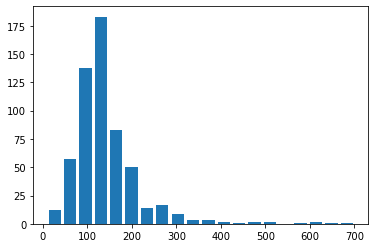

In [38]:
x = df_1.LoanAmount
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## After Transformation

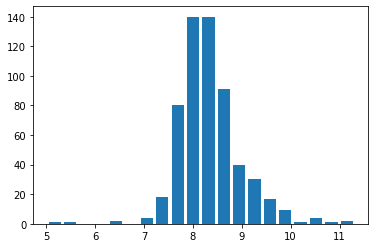

In [39]:
df_1['LoanAmount'] = np.log(df_1['LoanAmount']+1)
x = df_1.ApplicantIncome
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## Before transformation

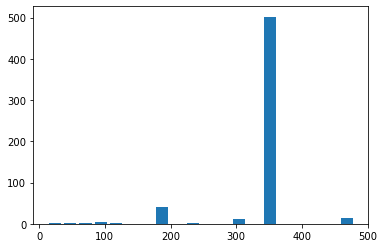

In [40]:
x = df_1.Loan_Amount_Term
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

## After Transformation

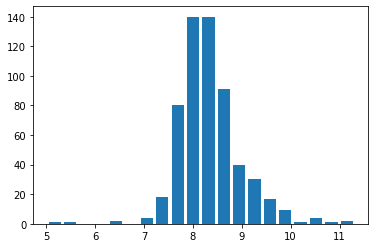

In [41]:
df_1['Loan_Amount_Term'] = np.log(df_1['Loan_Amount_Term']+1)
x = df_1.ApplicantIncome
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

In [42]:
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.0,4.995975,5.888878,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,1508.0,4.859812,5.888878,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.0,4.204693,5.888878,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,2358.0,4.795791,5.888878,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.0,4.955827,5.888878,1.0,Urban,Y


In [43]:
df_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Correlation Matrix

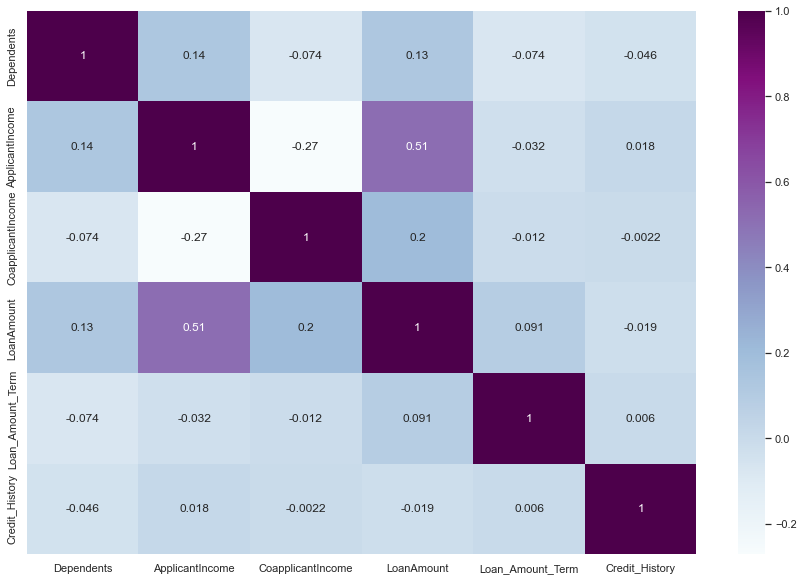

In [44]:
corr = df_1.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True,cmap="BuPu")
plt.show()

# Feature Selection

In [45]:
# drop unnecessary columns
cols = ['Loan_ID','Gender']
df_1 = df_1.drop(columns=cols, axis=1)
df_1.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,8.674197,0.0,4.995975,5.888878,1.0,Urban,Y
1,Yes,1,Graduate,No,8.430327,1508.0,4.859812,5.888878,1.0,Rural,N
2,Yes,0,Graduate,Yes,8.006701,0.0,4.204693,5.888878,1.0,Urban,Y
3,Yes,0,Not Graduate,No,7.857094,2358.0,4.795791,5.888878,1.0,Urban,Y
4,No,0,Graduate,No,8.699681,0.0,4.955827,5.888878,1.0,Urban,Y


In [46]:
df_1.dtypes

Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Label Encoding for Categorical data

In [47]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ["Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in categorical_features:
    df_1[col] = le.fit_transform(df_1[col])

In [48]:
df_1.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,8.674197,0.0,4.995975,5.888878,1.0,2,1
1,1,1,0,0,8.430327,1508.0,4.859812,5.888878,1.0,0,0
2,1,0,0,1,8.006701,0.0,4.204693,5.888878,1.0,2,1
3,1,0,1,0,7.857094,2358.0,4.795791,5.888878,1.0,2,1
4,0,0,0,0,8.699681,0.0,4.955827,5.888878,1.0,2,1


## Train-Test Split

In [49]:
X = df_1.drop(columns=['Loan_Status'], axis=1)
y = df_1.Loan_Status

In [50]:
X.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,8.674197,0.0,4.995975,5.888878,1.0,2
1,1,1,0,0,8.430327,1508.0,4.859812,5.888878,1.0,0
2,1,0,0,1,8.006701,0.0,4.204693,5.888878,1.0,2
3,1,0,1,0,7.857094,2358.0,4.795791,5.888878,1.0,2
4,0,0,0,0,8.699681,0.0,4.955827,5.888878,1.0,2


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle = True, stratify = y)

## Model Training

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
model.coef_

array([[ 4.56744541e-01,  4.66879177e-02, -3.17235460e-01,
         5.92412032e-02, -1.56483946e-01,  9.87143508e-05,
        -5.24783958e-02, -1.76729972e-01,  3.33366375e+00,
         1.85347733e-01]])

In [54]:
model.intercept_

array([0.04526611])

In [55]:
df_1.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,8.674197,0.0,4.995975,5.888878,1.0,2,1
1,1,1,0,0,8.430327,1508.0,4.859812,5.888878,1.0,0,0
2,1,0,0,1,8.006701,0.0,4.204693,5.888878,1.0,2,1
3,1,0,1,0,7.857094,2358.0,4.795791,5.888878,1.0,2,1
4,0,0,0,0,8.699681,0.0,4.955827,5.888878,1.0,2,1


# Model Score Checking

### Logistic Regression Model

In [56]:
 model.score(x_train,y_train)

0.8103448275862069

In [57]:
 model.score(x_test,y_test)

0.8205128205128205

# Model Prediction

In [58]:
model_pred=model.predict(x_test)
model_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1])

In [59]:
x_test.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
579,0,0,0,0,8.065579,2917.0,5.087596,5.888878,1.000000,2
392,1,0,0,0,7.857094,2115.0,4.795791,5.888878,0.846995,2
337,1,2,0,1,7.824446,4600.0,5.176150,5.888878,1.000000,0
404,0,0,0,1,8.914895,0.0,5.273000,5.888878,1.000000,0
477,1,2,0,0,7.963460,1872.0,4.890349,5.888878,0.000000,1


In [60]:
#predicting using random values
x = np.array([[0.45, 0.466, 0.12, 0.567, 8,2917,5,5,1,1]])
model.predict(x)

array([1])

In [61]:
#checking the model using the actual value
x = np.array([[0,0,0,0,8.065579,2917.0,5.087596,5.888878,1.000000,2]])
model.predict(x)

array([1])

# Conclusion

### The model has been developed using Logistic Regression Alogrithm. The train and test acuracy of the model is 81% and 82% respectively. 